# 1. Import libraries to be used in this notebook

In [1]:
import xarray as xr # To read NetCDF files
import matplotlib.pyplot as plt # Core library for plotting
import matplotlib.cm as cm # To use different colormaps
from functions.Plot_2D import Plot_2D # To draw a map
import cartopy.crs as ccrs # For map projection

# 2. Read files

## 2.1. Model output

In [2]:
File_CONUS = '/glade/scratch/tilmes/archive/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01/atm/hist/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h1.2013-08.nc'
ds_CONUS = xr.open_dataset( File_CONUS ) 

File_ne30 = '/glade/campaign/acom/acom-climate/tilmes/CO_CONUS/f.e22.FCnudged.ne30_ne30_mg17.release-cesm2.2.0_spinup.2010_2020.001/atm/hist/f.e22.FCnudged.ne30_ne30_mg17.release-cesm2.2.0_spinup.2010_2020.001.cam.h1.2013-08.nc'
ds_ne30 = xr.open_dataset( File_ne30 )

# ===================================================
# Some community simulation files you can play with
# ===================================================
path_commsim = '/glade/campaign/acom/acom-climate/tilmes/CO_CONUS/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01/atm/hist/'

# Monthly mean files, interpolated to 0.9x1.25 regular grid
file_h0 = path_commsim + 'f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h0.2013-07.nc'
ds_h0 = xr.open_dataset( file_h0 ) 

# Monthly menas on native grid
file_h1 = path_commsim + 'f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h1.2013-07.nc'
ds_h1 = xr.open_dataset( file_h1 ) 

# Davily averages on native grid
file_h2 = path_commsim + 'f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h2.2013-07-01-00000.nc'
ds_h2 = xr.open_dataset( file_h2 ) 

# 6-hr output, interpolated to 0.9x1.25 regular grid
file_h3 = path_commsim + 'f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h3.2013-07-01-00000.nc'
ds_h3 = xr.open_dataset( file_h3 ) 

# 1-hr output on native grid
file_h4 = path_commsim + 'f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h4.2013-07-01-00000.nc'
ds_h4 = xr.open_dataset( file_h4 ) 

# ====================================================
# And timeseries files from the community simulation
# ====================================================
# path_tseries = '/glade/campaign/acom/acom-climate/tilmes/CO_CONUS/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01/atm/proc/tseries/'

# # monthly timeseries files for Ozone (h1 files)
# file_m_o3 = path_tseries + '/month_1/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h1.O3.201201-201212.nc'
# ds_m_o3 = xr.open_dataset( file_m_o3 )

# # daily timeseries files for Ozone (h2 files)
# file_d_o3 = path_tseries + '/day_1/f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01.cam.h2.O3.20120601-20120630.nc'
# ds_d_o3 = xr.open_dataset( file_d_o3 )


## 2.2. Check data we just read
### We can see the variable list and dimension of each variable
### Click on the page icon to find out attributes of variable
### To learn more about xarray, check out this webpage: http://xarray.pydata.org/en/stable/user-guide/index.html

In [4]:
ds_CONUS

<xarray.Dataset>
Dimensions:       (ncol: 174098, lev: 32, ilev: 33, time: 1, nbnd: 2)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) datetime64[ns] 2013-09-01
Dimensions without coordinates: ncol, nbnd
Data variables: (12/86)
    lat           (ncol) float64 ...
    lon           (ncol) float64 ...
    area          (ncol) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    hyai          (ilev) float64 ...
    ...            ...
    pom_a4        (time, lev, ncol) float32 ...
    so4_a1        (time, lev, ncol) float32 ...
    so4_a2        (time, lev, ncol) float32 ...
    so4_a3        (time, lev, ncol) float32 ...
    soa_a1        (time, lev, ncol) float32 ...
    soa_a2        (time, lev, ncol) float32 ...
Attributes:
    ne:                0
    np:                4
    Conventions:       CF-1.0
    source:            CAM
    case:              f.e22.FCcotagsNudged.ne0CONUSne30x8.cesm220.2012-01
    logname:           tilmes
    host:              cheyenne2
    initial_file:      /glade/p/acom/MUSICA/restart/ne0CONUSne30x8/f.e22.FCnu...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/se/ne30x...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

## 2.2.1. Looking into the dataset
### Only a few examples are listed here. If you are not familiar with python, see https://ncar-hackathons.github.io/python-general/intro.html
### Numpy (abbreviated as "np") offers comprehensive mathematical functions: https://numpy.org/doc/stable/user/whatisnumpy.html

In [5]:
# Check date. CESM dates indicate the end of the averaing period, so for monthly mean of August 2013, the date is 20130901
print( 'Date:', ds_CONUS.date.values )

# unit of variables
print( 'The unit of O3:', ds_CONUS['O3'].units )
print( 'The unit of SFCO:', ds_CONUS['SFCO'].units )

# Shape of array
print( 'Array shape of O3:', ds_CONUS['O3'].shape )

# min and max values of variables
print( 'O3 [ppbv] min:', np.min(ds_CONUS['O3'].values)*1e9, ', max:', np.max(ds_CONUS['O3'].values)*1e9 )
print( 'SFC O3 [ppbv] min:', np.min(ds_CONUS['O3'].values[:,-1,:])*1e9, ', max:', np.max(ds_CONUS['O3'].values[:,-1,:])*1e9 )

# Arithmetic operation can simply be done  
print( '== Global mean precipitation rate [' + ds_CONUS['PRECL'].units + ']' )
print( '- Large scale:', np.mean(ds_CONUS['PRECL'].values) )
print( '- Convective:', np.mean(ds_CONUS['PRECC'].values) )
print( '- Total:', np.mean(ds_CONUS['PRECL'].values + ds_CONUS['PRECC'].values) )

Date: [20130901]
The unit of O3: mol/mol
The unit of SFCO: kg/m2/s
Array shape of O3: (1, 32, 174098)
O3 [ppbv] min: 2.907875051860742 , max: 9557.330486131832
SFC O3 [ppbv] min: 2.907875051860742 , max: 104.52558996121297
== Global mean precipitation rate [m/s]
- Large scale: 2.2207612e-08
- Convective: 9.498883e-09
- Total: 3.17065e-08


## 2.3. SCRIP file
### SCRIP file has grid information that is needed to plot values on map
### Don't have to read, just locate where the files are

In [6]:
SCRIP_CONUS = '/glade/p/acom/MUSICA/grids/ne0CONUSne30x8/ne0CONUS_ne30x8_np4_SCRIP.nc'
SCRIP_ne30 = '/glade/p/acom/MUSICA/grids/ne30np4/ne30np4_091226_pentagons.nc'

# 3. Plot examples

## 3.1. Global map

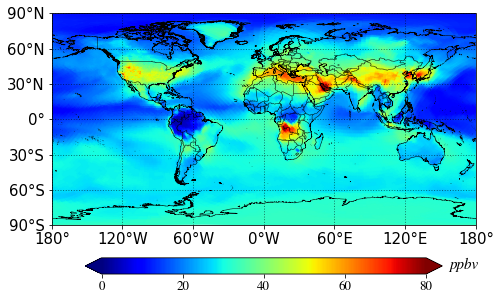

In [7]:
# - multiplied by 1e9 to make "mol/mol" "ppbv"
# - scrip_file must be provided for spectral element grid plot
# - cmax is used to limit plotted colorscale up to 80. cmin can be used for minimum value in a similar way
# - unit is for adding an unit on the plot
Plot_2D( ds_CONUS['O3'][0,-1,:]*1e9, scrip_file=SCRIP_CONUS, cmax=80, unit='ppbv' )

## 3.2. Regional map - U.S.

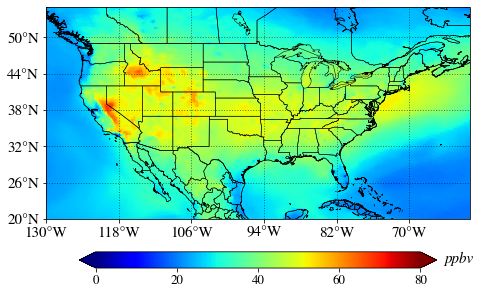

In [8]:
# we can add state lines by state=True
# we can also specify longitude & latitude ranges using lon_range and lat_range keywords
p = Plot_2D( ds_CONUS['O3'][0,-1,:]*1e9, scrip_file=SCRIP_CONUS,
             cmax=80, unit='ppbv', state=True, lon_range=[-130,-60], lat_range=[20,55] )

## 3.3. Same as 3.2 but with a custom colorbar

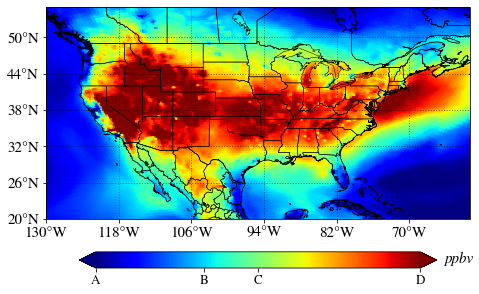

In [9]:
colorticks = [20, 30, 35, 50]
colorlabels = ['A', 'B', 'C', 'D']

# we can add state lines by state=True
# we can also specify longitude & latitude ranges using lon_range and lat_range keywords
Plot_2D( ds_CONUS['O3'][0,-1,:]*1e9, scrip_file=SCRIP_CONUS,
         cmin=20, cmax=50, unit='ppbv', state=True, lon_range=[-130,-60], lat_range=[20,55],
         colorticks=colorticks, colorlabels=colorlabels)

## 3.4. Add a location point

Text(-104.7705, 40.515, 'Boulder')

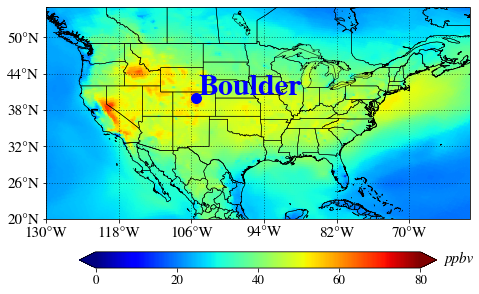

In [10]:
# Now we get an instance from Plot_2D function (p = Plot_2D(...))
p = Plot_2D( ds_CONUS['O3'][0,-1,:]*1e9, scrip_file=SCRIP_CONUS,
             cmax=80, unit='ppbv', state=True, lon_range=[-130,-60], lat_range=[20,55] )

# Add a circle marker 
p.ax.plot( -105.2705, 40.0150, marker='o', markersize=10, color='blue' )
p.ax.text( -105.2705+0.5, 40.0150+0.5, 'Boulder', color='blue', size=30, weight='semibold' )

## 3.5. Log-scale plot

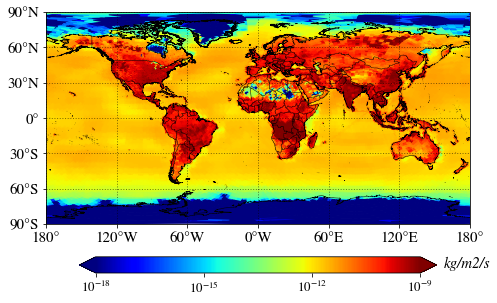

In [11]:
p = Plot_2D( ds_CONUS['SFCO'][0,:], scrip_file=SCRIP_CONUS, 
             cmin=1e-18, cmax=1e-9,
             log_scale=True, unit='kg/m2/s' )

## 3.6. Plot two panels with different grids - ne30 and ne30x8_CONUS
### See different built-in colormaps in matplotlib

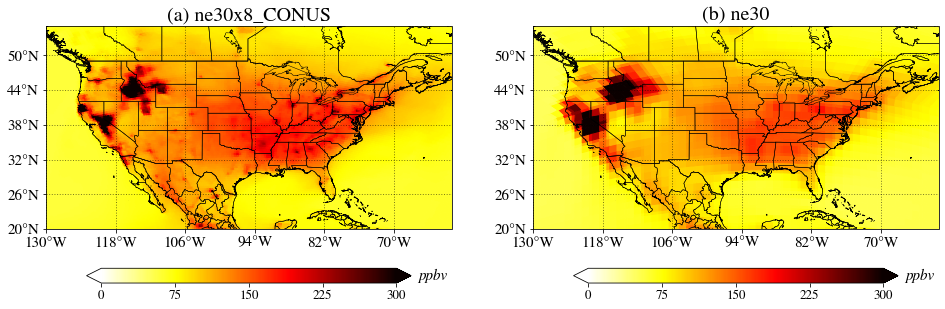

In [12]:
# Create a new figure canvas
fig = plt.figure( figsize=(16,6) ) 

# - title for each plot is added with the "title" keyword
# - we can change colormaps using cmap keyword. Give it a spin: change it to cmap=cm.bwr and see how it changes
# Left panel - ne30x8 regional refinement over CONUS|
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
Plot_2D( ds_CONUS['CO'][0,-1,:]*1e9, scrip_file=SCRIP_CONUS, ax=ax1,
         cmax=300, unit='ppbv', state=True, lon_range=[-130,-60], lat_range=[20,55],
         title='(a) ne30x8_CONUS', cmap=cm.hot_r )

# Right panel - ne30 global
ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())
Plot_2D( ds_ne30['CO'][0,-1,:]*1e9, scrip_file=SCRIP_ne30, ax=ax2,
         cmax=300, unit='ppbv', state=True, lon_range=[-130,-60], lat_range=[20,55],
         title='(b) ne30', cmap=cm.hot_r )


## 3.7. Same as 3.6 but with one big colorbar and title

Text(0.5, 0.88, 'CO mixing ratio')

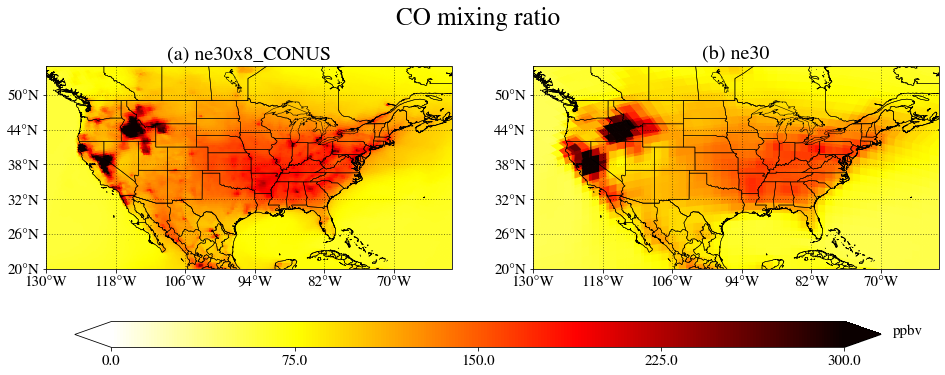

In [13]:
# Create a new figure canvas
fig = plt.figure( figsize=(16,12) ) 

# - title for each plot is added with the "title" keyword
# - we can change colormaps using cmap keyword. Give it a spin: change it to cmap=cm.bwr and see how it changes
# Left panel - ne30x8 regional refinement over CONUS|
ax1 = fig.add_subplot(2,2,1,projection=ccrs.PlateCarree())
Plot_2D( ds_CONUS['CO'][0,-1,:]*1e9, scrip_file=SCRIP_CONUS, ax=ax1,
         cmax=300, unit='ppbv', state=True, lon_range=[-130,-60], lat_range=[20,55],
         title='(a) ne30x8_CONUS', cmap=cm.hot_r, colorbar=False )

# Right panel - ne30 global
ax2 = fig.add_subplot(2,2,2,projection=ccrs.PlateCarree())
p = Plot_2D( ds_ne30['CO'][0,-1,:]*1e9, scrip_file=SCRIP_ne30, ax=ax2,
             cmax=300, unit='ppbv', state=True, lon_range=[-130,-60], lat_range=[20,55],
             title='(b) ne30', cmap=cm.hot_r, colorbar=False )

# Add a colorbar
# set up where a colorbar will be located
cbar_ax = fig.add_axes([0.15,0.5,0.70,0.03])
# plot a colorbar
cb = fig.colorbar( p.im, cax=cbar_ax, extend='both', orientation='horizontal', ticks=p.colorticks )
# Make texts in the colorbar bigger
cb1 = cb.ax.set_xticklabels( p.colorticks, size=15 )

# Add a unit
# - for more details on transformations, check out here: https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html
# - we use fig.transFigure here, (0,0) is bottom left of the figure and (1,1) is top right of the figure. 
plt.text( 0.86, 0.515, 'ppbv', transform=fig.transFigure, size=15 )

# Add a title
plt.text( 0.50, 0.88, 'CO mixing ratio', transform=fig.transFigure, size=25, ha='center', va='center' )

## 3.8. Plot with model grid lines and save the figure as png file

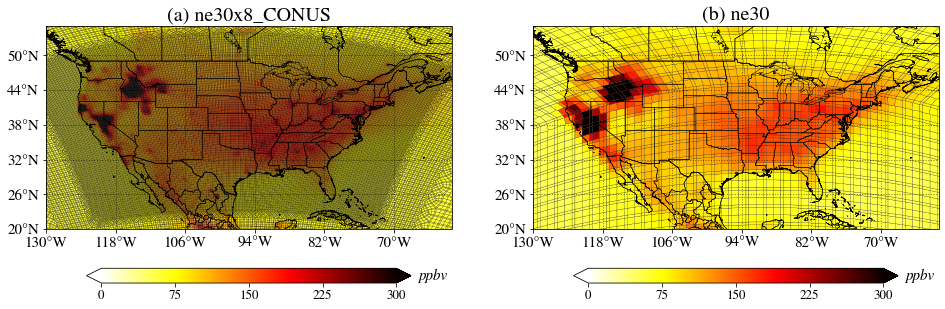

In [14]:
# Create a new figure canvas
fig = plt.figure( figsize=(16,6) ) 

# - title for each plot is added with the "title" keyword
# - we can change colormaps using cmap keyword. Give it a spin: change it to cmap=cm.bwr and see how it changes
# Left panel - ne30x8 regional refinement over CONUS|
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
Plot_2D( ds_CONUS['CO'][0,-1,:]*1e9, scrip_file=SCRIP_CONUS, ax=ax1,
         cmax=300, unit='ppbv', state=True, lon_range=[-130,-60], lat_range=[20,55],
         title='(a) ne30x8_CONUS', cmap=cm.hot_r, grid_line=True, grid_line_lw=0.2 )

# Right panel - ne30 global
ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())
Plot_2D( ds_ne30['CO'][0,-1,:]*1e9, scrip_file=SCRIP_ne30, ax=ax2,
         cmax=300, unit='ppbv', state=True, lon_range=[-130,-60], lat_range=[20,55],
         title='(b) ne30', cmap=cm.hot_r, grid_line=True, grid_line_lw=0.2  )

# Save this as a png file
plt.savefig( 'CO_August_2013.png' )

# Put a question mark after any function to look at the detailed usage

In [15]:
plt.savefig?

Signature: plt.savefig(*args, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None, metadata=None)

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or binary file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and *fname* has n